# Problem Statement

You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars to and from the airport) and recommend ways to improve the situation. As a result of the analysis, we should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

In [180]:
#Warnings
import warnings 
warnings.filterwarnings("ignore")
#import the numpy,pandas,matplotlib,seaborn packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



-----------Import and Read Load the Uber Request Data into a pandas Data frames and name it uberReq----------

In [181]:
#Reading the uber request  data
uberfile1 = pd.read_csv("Uber_Request_Data.csv")

In [182]:
uberfile1

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1

# Data Cleaning And Preparation

In [183]:
#Check duplicate values on request id

duplicate_values_of_request_id = sum(uberfiel1['Request id'].duplicated())

In [184]:
duplicate_values_of_request_id # No duplicates

0

# checking and validating missing values


In [185]:
#All rows should have request time stamp , pickup point and request id
Null_values_request_Timestamp = uberfile1['Request timestamp'].isnull().sum()
Null_values_request_Timestamp#No missing data

0

In [186]:
#check null values on request id
Null_values_request_id = uberfile1['Request id'].isnull().sum()
Null_values_request_id #No misssing Data

0

In [187]:
#check null values on pickup point
Null_values_pickup_point = uberfile1['Pickup point'].isnull().sum()
Null_values_pickup_point #No missing data

0

In [188]:
#Check Similar values
Status_values = uberfile1['Status'].unique()
Status_values # All distinct values

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [189]:
#Check similar values
Pickup_point_values = uberfile1['Pickup point'].unique()
Pickup_point_values


array(['Airport', 'City'], dtype=object)

In [190]:
#completed trips should have both pickup point and drop timestamps and driver id
completedtrips = uberfile1[(uberfile1['Status'] =='Trip Completed')]
completedtrips['Drop timestamp' ].isnull().sum() #All timestamps are present

0

In [191]:
completedtrips['Driver id'].isnull().sum() # All Driver id are present

0

In [192]:
#Cancelled trips should have pickup point and driver id
cancelledtrips = uberfile1[(uberfile1['Status'] =='Cancelled')]
cancelledtrips['Request timestamp' ].isnull().sum() # All timestamps are present

0

In [193]:
cancelledtrips['Driver id'].isnull().sum() # All Driver id are present


0

In [194]:
#To convert the request_timestamp into uniform date time format
uberfile1["Request timestamp"] = uberfile1["Request timestamp"].apply(lambda x :pd.to_datetime(x)) # date in uniform  format
uberfile1['Request Hour'] = uberfile1['Request timestamp'].dt.hour

In [195]:
#To convert the drop_timestamp into uniform date time format
uberfile1["Drop timestamp"] = uberfile1["Drop timestamp"].apply(lambda x :pd.to_datetime(x)) # Date in unifrom format


In [196]:
uberfile1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request Hour         6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.9+ KB


In [197]:
#To check the null values
uberfile1.isnull().sum()
#uberfile.isnull().sum().any() #-->True
#Uberfie.isnull().any().sum()  --> result in boolean values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request Hour            0
dtype: int64

In [198]:
uberfile1.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

From above results ```Driver Id``` and ```No cars Available``` both are same.so, Uber Request Data doesn't have  any null values.


In [199]:
#Dropping the unnecessary colum
uberfile1.drop(["Driver id"],  axis = 1)

Request id Pickup point             Status   Request timestamp  \
0            619      Airport     Trip Completed 2016-11-07 11:51:00   
1            867      Airport     Trip Completed 2016-11-07 17:57:00   
2           1807         City     Trip Completed 2016-12-07 09:17:00   
3           2532      Airport     Trip Completed 2016-12-07 21:08:00   
4           3112         City     Trip Completed 2016-07-13 08:33:16   
5           3879      Airport     Trip Completed 2016-07-13 21:57:28   
6           4270      Airport     Trip Completed 2016-07-14 06:15:32   
7           5510      Airport     Trip Completed 2016-07-15 05:11:52   
8           6248         City     Trip Completed 2016-07-15 17:57:27   
9            267         City     Trip Completed 2016-11-07 06:46:00   
10          1467      Airport     Trip Completed 2016-12-07 05:08:00   
11          1983         City     Trip Completed 2016-12-07 12:30:00   
12          2784      Airport     Trip Completed 2016-07-13 04:49:20   
13          3075         City     Trip Completed 2016-07-13 08:02:53   
14          3379         City     Trip Completed 2016-07-13 14:23:02   
15          3482      Airport     Trip Completed 2016-07-13 17:23:18   
16          4652         City     Trip Completed 2016-07-14 12:01:02   
17          5335      Airport     Trip Completed 2016-07-14 22:24:13   
18           535      Airport     Trip Completed 2016-11-07 10:00:00   
19           960      Airport     Trip Completed 2016-11-07 18:45:00   
20          1934      Airport     Trip Completed 2016-12-07 11:17:00   
21          2083      Airport     Trip Completed 2016-12-07 15:46:00   
22          2211      Airport     Trip Completed 2016-12-07 18:00:00   
23          3096      Airport     Trip Completed 2016-07-13 08:17:29   
24          3881      Airport     Trip Completed 2016-07-13 21:54:18   
25          5254         City     Trip Completed 2016-07-14 21:23:03   
26          5434         City     Trip Completed 2016-07-15 02:41:38   
27          5916         City     Trip Completed 2016-07-15 10:00:43   
28           669         City     Trip Completed 2016-11-07 13:08:00   
29          1567      Airport     Trip Completed 2016-12-07 06:21:00   
...          ...          ...                ...                 ...   
6715        6683         City  No Cars Available 2016-07-15 22:34:01   
6716        6686      Airport  No Cars Available 2016-07-15 22:36:13   
6717        6688      Airport  No Cars Available 2016-07-15 22:37:37   
6718        6689      Airport  No Cars Available 2016-07-15 22:43:46   
6719        6693         City  No Cars Available 2016-07-15 22:49:33   
6720        6696         City  No Cars Available 2016-07-15 22:49:45   
6721        6697      Airport  No Cars Available 2016-07-15 22:51:18   
6722        6709      Airport  No Cars Available 2016-07-15 22:56:00   
6723        6706      Airport  No Cars Available 2016-07-15 22:58:15   
6724        6708         City  No Cars Available 2016-07-15 23:03:23   
6725        6713         City  No Cars Available 2016-07-15 23:08:14   
6726        6715         City  No Cars Available 2016-07-15 23:11:41   
6727        6716         City  No Cars Available 2016-07-15 23:14:36   
6728        6718      Airport  No Cars Available 2016-07-15 23:14:39   
6729        6720         City  No Cars Available 2016-07-15 23:16:48   
6730        6722      Airport  No Cars Available 2016-07-15 23:18:21   
6731        6725      Airport  No Cars Available 2016-07-15 23:21:53   
6732        6728         City  No Cars Available 2016-07-15 23:26:50   
6733        6730      Airport  No Cars Available 2016-07-15 23:27:55   
6734        6732      Airport  No Cars Available 2016-07-15 23:35:50   
6735        6737      Airport  No Cars Available 2016-07-15 23:39:15   
6736        6744      Airport  No Cars Available 2016-07-15 23:42:51   
6737        6740         City  No Cars Available 2016-07-15 23:43:54   
6738        6746         City  No Cars Availab

In [238]:
uberfile1[(uberfile1['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

# (EDA)Exploratory Data Analysis on Uber Request Data

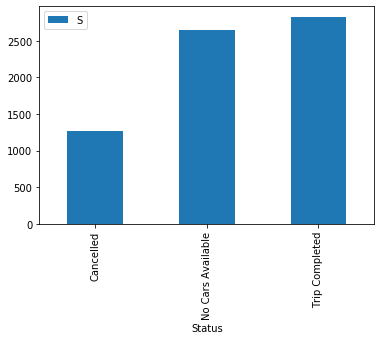

In [201]:
#Univariate analysis on Status column
status = uberfile1["Status"].value_counts().sort_index().plot.bar()
status.set_xlabel("Status")
status.legend("S")

From above graph to note the point is ```No cars Available``` is more than the number of trips ```cancelled```.

Text(0.5, 0, 'Pickup point')

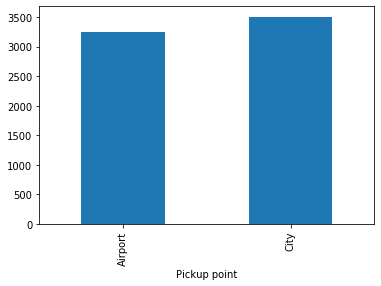

In [202]:
#Univariate analysis on pickup point column
pickup_point = uberfile1["Pickup point"].value_counts().sort_index().plot.bar()
pickup_point.set_xlabel("Pickup point")



The Pickup points ```Airport``` and ```City``` are almost equal time present in the dataset.

# Bivariate Analysis

In [239]:
#grouping by status and pickup point.
uber_status = uberfile1.groupby(['Status','Pickup point']).size()
uber_status

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

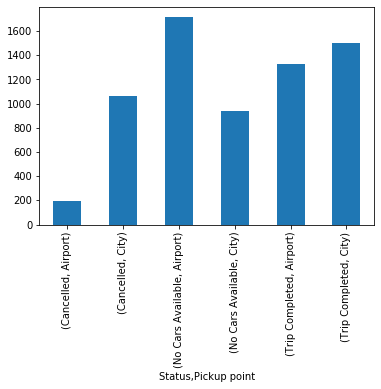

In [240]:
uber_status.plot.bar(stacked = True)

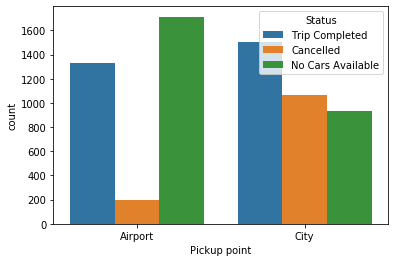

In [205]:
#visualizig the count of status and pickup point of bivariate analusis
sns.countplot(x=uberfile1['Pickup point'],hue = uberfile1['Status'],data = uberfile1)

#### Bivariate anaysis conclusion of status and pickup point columns:

There are more ```No cars Available``` from ```Airport``` to ```city``` and more cars ```cancelled``` from ```city``` to ```Airport```

## Deriving New Metrics

In [206]:
#Request and drop hours
uberfile1['Request Day'] = uberfile1['Request timestamp'].apply(lambda x:datetime.strftime(x,'%A'))
uberfile1                                                                                                  

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp  Request Hour Request Day  
0    2016-11-07 11:51:00 2

In [207]:
#Time slots 
def time_period(x):
    if x<5:
        return "Early Morning"
    elif 5<=x<10:
        return "Morning"
    elif 10<=x<17:
        return "Day Time"
    elif 17<=x<22:
        return "Evening"
    else:
        return "Late Night"
uberfile1['Time slots'] = uberfile1['Request Hour'].apply(lambda x:time_period(x))


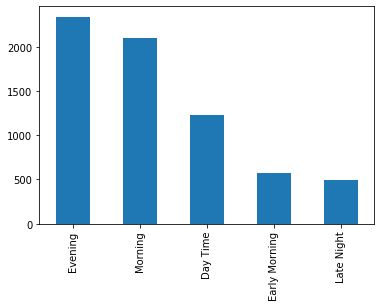

In [208]:
uberfile1['Time slots'].value_counts().plot.bar()

In [209]:
#Demand can include trips completed , Cancelled or no cars available,so that we will create a column called Demand with the values of 1
uberfile1['Demand']  =1

In [210]:
#Suppply can only be the trips completed . rest all are excluded. so , that we will create a column called with 1 as a supply value trips completed and 0 otherwise

uberfile1['Supply']=0
uberfile1.loc[(uberfile1['Status']== 'Trip Completed'),'Supply']=1

In [211]:
#TO check the uber demand supply gap we will define a column called 'Gap' with the difference of 'Demand' column and 'Supply' column
uberfile1['Gap'] = uberfile1['Demand']-uberfile1['Supply']
uberfile1.loc[uberfile1['Gap']==0,'Gap'] = 'Trip Completed'
uberfile1.loc[uberfile1['Gap']==1,'Gap'] = 'Trip Not completed'

In [212]:
uberfile1 = uberfile1.drop(['Request Hour','Demand','Supply'],axis=1)
uberfile1

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379         City        2.0     Trip Completed   
15          3482      Airport        2.0     Trip Completed   
16          4652         City        2.0     Trip Completed   
17          5335      Airport        2.0     Trip Completed   
18           535      Airport        3.0     Trip Completed   
19           960      Airport        3.0     Trip Completed   
20          1934      Airport        3.0     Trip Completed   
21          2083      Airport        3.0     Trip Completed   
22          2211      Airport        3.0     Trip Completed   
23          3096      Airport        3.0     Trip Completed   
24          3881      Airport        3.0     Trip Completed   
25          5254         City        3.0     Trip Completed   
26          5434         City        3.0     Trip Completed   
27          5916         City        3.0     Trip Completed   
28           669         City        4.0     Trip Completed   
29          1567      Airport        4.0     Trip Completed   
...          ...          ...        ...                ...   
6715        6683         City        NaN  No Cars Available   
6716        6686      Airport        NaN  No Cars Available   
6717        6688      Airport        NaN  No Cars Available   
6718        6689      Airport        NaN  No Cars Available   
6719        6693         City        NaN  No Cars Available   
6720        6696         City        NaN  No Cars Available   
6721        6697      Airport        NaN  No Cars Available   
6722        6709      Airport        NaN  No Cars Available   
6723        6706      Airport        NaN  No Cars Available   
6724        6708         City        NaN  No Cars Available   
6725        6713         City        NaN  No Cars Available   
6726        6715         City        NaN  No Cars Available   
6727        6716         City        NaN  No Cars Available   
6728        6718      Airport        NaN  No Cars Available   
6729        6720         City        NaN  No Cars Available   
6730        6722      Airport        NaN  No Cars Available   
6731        6725      Airport        NaN  No Cars Available   
6732        6728         City        NaN  No Cars Available   
6733        6730      Airport        NaN  No Cars Available   
6734        6732      Airport        NaN  No Cars Available   
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp Request Day     Time slots  \
0    2016-11-07 11:51:00

# Task 5 : Graphical Analysis

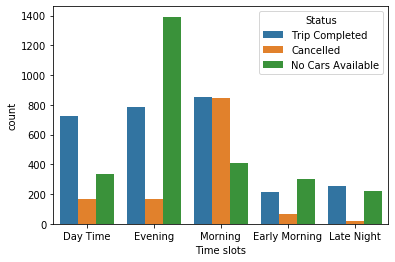

In [213]:
#plot to find the count of the three requests , according to the defined time slots
sns.countplot(x = uberfile1['Time slots'],hue = uberfile1['Status'] , data  = uberfile1)

#### Conclusions from above plot:
Most ```No cars Available``` are in the ```Evening``` and Most ```Cancelled ``` trips are in the ``` Morning```.


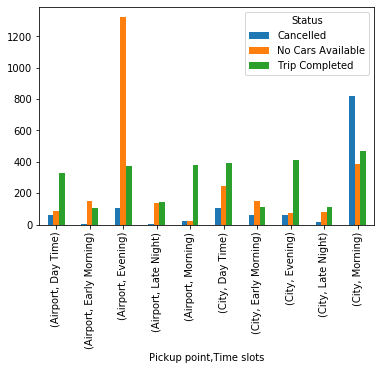

In [214]:
#Plot to find the count of the status , according to bith pickup point and the time slot 
pickup_point = pd.DataFrame(uberfile1.groupby(['Pickup point','Time slots','Status'])['Request id'].count().unstack(fill_value=0))
pickup_point.plot.bar()

#### Conclusions from above plot:
 

Most ```No cars Available``` are in the ```Evening``` from ```Airport``` to ```city``` and Most ``` Cancelled ``` trips are in the ```Morning``` from ```city``` to ```Airport```.

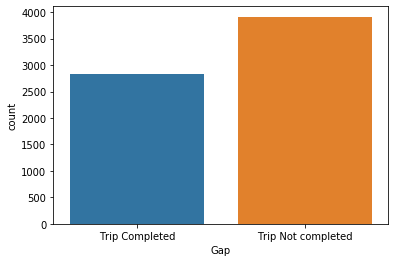

In [215]:
#Plot to count the number of requests that was completed and which was not
sns.countplot(x = uberfile1['Gap'],data = uberfile1)

Conclusions from above plot:
Most ```Trip not completed``` than ```Trip completed```.

In [231]:
#Plot to count the number of requests that was completed and which was not against the time slot.
gap_time_slot = pd.DataFrame(uberfile1.groupby(['Time slots','Gap'])['Request id'].count().unstack(fill_value=0))
gap_time_slot

Gap            Trip Completed  Trip Not completed
Time slots                                       
Day Time                  722                 502
Early Morning             214                 364
Evening                   784                1558
Late Night                257                 241
Morning                   854                1249

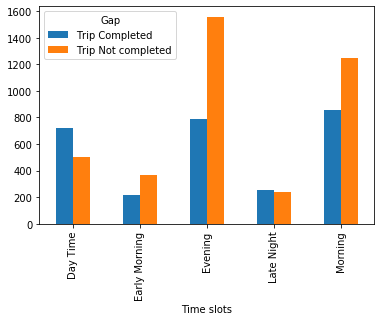

In [233]:
gap_time_slot.plot.bar()

In [228]:
#plot to count the number of requests that was completed and which was not , against pickup point
gap_pickup_point = pd.DataFrame(uberfile1.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_point                     


Gap           Trip Completed  Trip Not completed
Pickup point                                    
Airport                 1327                1911
City                    1504                2003

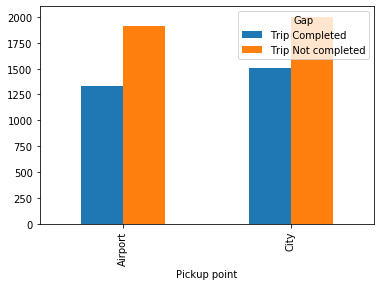

In [230]:
gap_pickup_point.plot.bar()

In [227]:
#plot to count the number of requests that was completed and which was not completed  for the final  analysis
gap_main = pd.DataFrame(uberfile1.groupby(['Time slots','Pickup point','Gap'])['Request id'].count().unstack(fill_value = 0))
gap_main

Gap                         Trip Completed  Trip Not completed
Time slots    Pickup point                                    
Day Time      Airport                  327                 151
              City                     395                 351
Early Morning Airport                  103                 150
              City                     111                 214
Evening       Airport                  373                1427
              City                     411                 131
Late Night    Airport                  142                 139
              City                     115                 102
Morning       Airport                  382                  44
              City                     472                1205

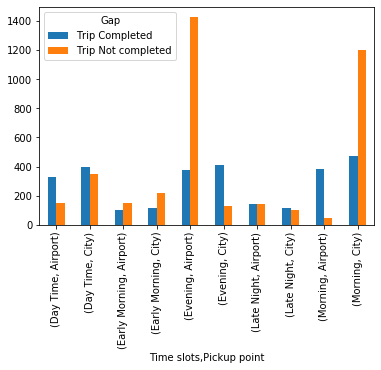

In [234]:
gap_main.plot.bar()

## Results Obtained ##
**From Airort pickup**:Reason behind this gap may occur in different formats like in evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city or may driver worry about the traffic during the evening hours because leaving time of employees.

**From City pickup**:According to the analysis, the morning time slot is most stumbling block where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city and may worry about traffic that customer may or may not reach the airport in time may result in bad review.

### conclusion ###  
Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand:

1.For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.(based on budget plan)
2.Uber can give some insentives to the driver who will complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.
3.And also by creating a freelance site so that uber can assign a cab to the third party and can get the commission from the above trips in this no need of keeping cars stand in the airport
4.Last but sure solution to bring down the gap is to increase the numbers of cabs and connections with the third parties in its fleet.
